In [1]:
import csv
import numpy as np
from collections import defaultdict
from matplotlib import pyplot
import pandas
import matplotlib

In [2]:
BLANKS=["","RBNF1", "RBNF2", "RBNF", "0", "RBNF 1", "RBNF 2"]
TOTAL=2734
TOTAL_INTER= 2645

In [3]:
def loadCsvData(fileName):
	matrix = []
	# open a file
	with open(fileName) as f:
		reader = csv.reader(f)
        # loop over each row in the file
		for row in reader:

			# cast each value to a float
			doubleRow = []
			for value in row:
				doubleRow.append(value.strip())

			# store the row into our matrix
			matrix.append(doubleRow)
	return matrix

In [4]:
data= loadCsvData("data/metadata.csv")

In [5]:
data=pandas.DataFrame(data[1:], columns=data[0])

In [6]:
interviewtxt =loadCsvData("data/interview text file to ids.csv")

In [7]:
#interviewtxt2= loadCsvData("data/OHTAP_metadata - Interviews.csv")

In [8]:
interviewtxt=pandas.DataFrame(interviewtxt[1:], columns=interviewtxt[0])

In [9]:
#interviewtxt2=pandas.DataFrame(interviewtxt2[1:], columns=interviewtxt2[0])

In [10]:
ids_to_years=defaultdict(lambda: defaultdict(lambda:"0"))
for i in range(len(interviewtxt)):
    date=interviewtxt["date_of_first_interview"][i]
    year=date[date.rfind('/')+1:]
    ids=interviewtxt["interviewee_ids"][i].split(';')
    no_transcript=interviewtxt["no_transcript"][i]
    for num in ids:
        ids_to_years[num]["year"]= str(year)
        if no_transcript=="TRUE" and ids_to_years[num]["included"]=="0":
            ids_to_years[num]["included"]=False
        else:
            ids_to_years[num]["included"]=True

In [11]:
database=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(data)):
    if ids_to_years[data.loc[i, "interviewee_id"]]["included"]==False:
        continue
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        if value in BLANKS and atr == "real_interviewee_birth_year":
            value= data.loc[i, "approximate_interviewee_birth_year"]
        database[data.loc[i, "interviewee_id"]][atr]=value
    database[data.loc[i, "interviewee_id"]]["interview_year"]=ids_to_years[data.loc[i, "interviewee_id"]]["year"]

In [12]:
text_to_ids=defaultdict(lambda: defaultdict(lambda:"0"))
for i in range(len(interviewtxt)):
    if interviewtxt["no_transcript"][i]=="TRUE":
        continue
    name=interviewtxt.at[i, interviewtxt.columns[0]]
    name=name[:name.rfind('.')]
    name=name.replace('\'','_')
    people=interviewtxt["interviewee_ids"][i].split(';')
    women=False
    for j in people:
        if database[j]["sex"]=="Female":
            women=True
            break
    if not women:
        continue
    text_to_ids[name]["id"]=people
    date=interviewtxt["date_of_first_interview"][i]
    text_to_ids[name]["interview year"]= date[date.rfind("/")+1:]
print(len(text_to_ids))

2645


In [13]:
dataformatted=defaultdict(lambda: defaultdict(lambda:0))
for i in database : 
    if database[i]["sex"]=="Male":
        continue
    for atr in database[i]:
        value= database[i][atr]
        if value not in BLANKS:
            dataformatted[atr][value]+=1
for cat in dataformatted:
    total=0
    for x in dataformatted[cat]:
        total+= dataformatted[cat][x]
    dataformatted[cat]["No Info"]= TOTAL-total

In [14]:
ids_to_info=defaultdict(lambda: defaultdict(lambda:0))
for ids in database:
    ids_to_info[ids]["birth_decade"]=database[ids]["\ufeffbirth_decade"]
    ids_to_info[ids]["education"]=database[ids]["education"]
    ids_to_info[ids]["collection"]=database[ids]["collection_id"]
    ids_to_info[ids]["sex"]=database[ids]["sex"]
    ids_to_info[ids]["race"]=database[ids]["identified_race"]
    ids_to_info[ids]["interview_year"]=database[ids]["interview_year"]
    ids_to_info[ids]["birth_year"]=database[ids]["real_interviewee_birth_year"]

In [15]:
myfile = open("data/event_extents.txt", encoding="latin1")
txt = myfile.readlines()
myfile.close()

files=[]

names=set()
for i in txt:
    num= i.find("<Files")
    if num !=-1:
        files.append(i.strip())

for i in files:
    i=i.split();
    i=i[0]
    i=i[i.find("\\\\",8)+2:-1]
    names.add(i.strip())
print(names)
        

{'HM_Amoore_Renee', 'SCAL_Newman_Leslea', 'UNCTWMS_Chase_Harry_G_Chase_Patricia', 'HM_Rice_Constance_1', 'BWSP_Mikuriya_Mary', 'BWSP_Baumgarten_Sylvia', 'UNCTWMS_Prior_Karen_Swallow', 'SCVF_Payne_Ladoris', 'SCAP_Jimenez_Ileana', 'SCVF_Avery_Byllye', 'HM_Angelou_Maya', 'SCAL_Pogrebin_LettyCottin', 'SCVF_Asetoyer_Charon', 'WOL_Coleman_Carolyn', 'HM_Lewis_Tina', 'WOL_Gray_Twyla_Mason', 'HM_Giovanni_Nikki', 'BWOH_Thomas_Constance', 'SCAARJ_Mingus_Mia', 'SCAP_Callahan_Kara', 'HM_Rogers_Desiree', 'HM_Scott_Gloria', 'UNCSW_Murray_Pauli', 'HM_Cunningham_Evelyn', 'HM_Bath_Patricia', 'UNCTWMS_Herr_Mary', 'HM_Cooper_Maudine', 'UNCTWMS_Short_Joan_Boyd', 'BWOH_Harrison_Pleasant', 'HM_DeCosta-Willis_Miriam', 'SHSF_Jacobs_Charlotte', 'UNCTWMS_Fuchs_Laurie', 'UNCTWMS_Rostan_June', 'SCVF_Smith_Barbara', 'SCVF_Vazquez_Carmen', 'UNCTWMS_Stulberg_Dorothy', 'HM_Dawson_Lula', 'SCVF_Frantz_Marge', 'UNCTWMS_Cravey_Altha', 'HM_Fairhurst_Norma', 'UNCTWMS_Nickle_Carol', 'SCVF_Moraga_Cherrie', 'HM_Edwards_Audrey'

In [16]:
df_total_corpus = pandas.DataFrame([[TOTAL_INTER, len(names), int(len(names)/TOTAL_INTER*100)]],columns=["Total Corpus Interviews", "Number of Interviews Containing Speech Events", "Percentage Of Interviews Containing Speech Events"], index=[""])

In [17]:
display(df_total_corpus)

,Total Corpus Interviews,Number of Interviews Containing Speech Events,Percentage Of Interviews Containing Speech Events
,2645,453,17


In [18]:
races=['Black or African American', 'White', 'Asian', 'Hispanic/Latinx',  'Indigenous American or Alaska Native', 'Two or More Races', 'Other Race']

In [19]:
racemap=defaultdict(lambda:0)
for i in text_to_ids:
    for j in text_to_ids[i]["id"]:
        racemap[database[j]["identified_race"]]+=1
print(racemap)

defaultdict(<function <lambda> at 0x7fa00e191dc0>, {'Black or African American': 1200, 0: 139, 'White': 1230, 'Asian': 44, 'Hispanic/Latinx': 29, 'Other Race': 4, 'Two or More Races': 37, 'Indigenous American or Alaska Native': 101})


In [20]:
racemapevents=defaultdict(lambda:0)
for i in names:
    for j in text_to_ids[i]["id"]:
        racemapevents[database[j]["identified_race"]]+=1
print(racemapevents)

defaultdict(<function <lambda> at 0x7fa00e1d41f0>, {'Black or African American': 241, 'White': 176, 0: 7, 'Asian': 14, 'Hispanic/Latinx': 7, 'Indigenous American or Alaska Native': 5, 'Two or More Races': 6, 'Other Race': 1})


In [21]:
df_total_corpus = pandas.DataFrame([[racemap[races[i]], racemapevents[races[i]], int(100*racemapevents[races[i]]/racemap[races[i]])] for i in range(len(races))], index=races, columns=["Number of Interviews", "Number of Interviews Containing Speech Events", "Percentage of Interviews containing Speech Events"])

In [22]:
display(df_total_corpus)

,Number of Interviews,Number of Interviews Containing Speech Events,Percentage of Interviews containing Speech Events
Black or African American,1200,241,20
White,1230,176,14
Asian,44,14,31
Hispanic/Latinx,29,7,24
Indigenous American or Alaska Native,101,5,4
Two or More Races,37,6,16
Other Race,4,1,25


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

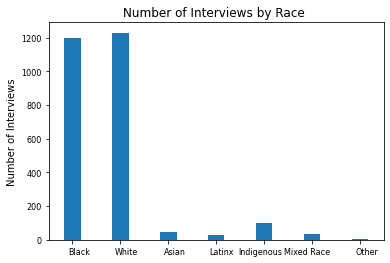

In [23]:
N = 7

ind = np.arange(N) 

# some example data
    
    
people = np.array([racemap['Black or African American'], racemap['White'], racemap['Asian'], racemap['Hispanic/Latinx'], racemap['Indigenous American or Alaska Native'], racemap['Two or More Races'], racemap['Other Race']])



# and plot it
fig, ax = pyplot.subplots()
ax.set_xticks(ind)
total=ax.bar(ind, people, .35,)
ax.set_xticklabels(["Black", "White", "Asian", "Latinx", "Indigenous", "Mixed Race", "Other"])
ax.set_title("Number of Interviews by Race ")
ax.set_ylabel('Number of Interviews')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .25
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')

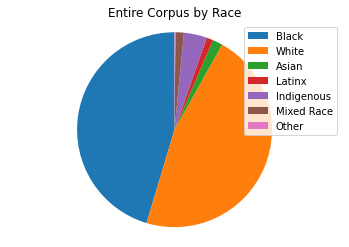

In [24]:
labels = ["Black", "White", "Asian", "Latinx", "Indigenous", "Mixed Race", "Other"]
sizes = [racemap['Black or African American'], racemap['White'], racemap['Asian'], racemap['Hispanic/Latinx'], racemap['Indigenous American or Alaska Native'], racemap['Two or More Races'], racemap['Other Race']]

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, labels=labels, startangle=90, labeldistance=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Entire Corpus by Race")
pyplot.legend()
pyplot.show()

In [25]:
racemapevents=defaultdict(lambda:0)
for i in names:
    for j in text_to_ids[i]["id"]:
        racemapevents[database[j]["identified_race"]]+=1
print(racemapevents)

defaultdict(<function <lambda> at 0x7fa00e2ce310>, {'Black or African American': 241, 'White': 176, 0: 7, 'Asian': 14, 'Hispanic/Latinx': 7, 'Indigenous American or Alaska Native': 5, 'Two or More Races': 6, 'Other Race': 1})


In [26]:
df_total_corpus = pandas.DataFrame([racemapevents['Black or African American'], racemapevents['White'], racemapevents['Asian'], racemapevents['Hispanic/Latinx'], racemapevents['Indigenous American or Alaska Native'], racemapevents['Two or More Races'], racemapevents['Other Race']],index=["Number of Interviews Containing Speech Events with Black Women", "Number of Interviews Containing Speech Events with White Women", "Number of Interviews Containing Speech Events with Asian Women", "Number of Interviews Containing Speech Events with Latinx Women", "Number of Interviews Containing Speech Events with Indigenous Women", "Number of Interviews Containing Speech Events with Mixed Race Women", "Number of Interviews Containing Speech Events with Women of Other Races"], columns=[""])

In [27]:
display(df_total_corpus)

,
Number of Interviews Containing Speech Events with Black Women,241
Number of Interviews Containing Speech Events with White Women,176
Number of Interviews Containing Speech Events with Asian Women,14
Number of Interviews Containing Speech Events with Latinx Women,7
Number of Interviews Containing Speech Events with Indigenous Women,5
Number of Interviews Containing Speech Events with Mixed Race Women,6
Number of Interviews Containing Speech Events with Women of Other Races,1


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

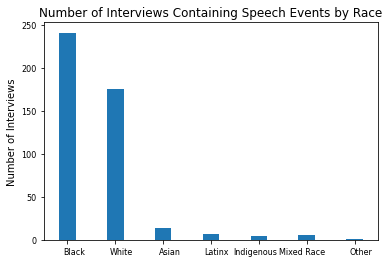

In [28]:
N = 7

ind = np.arange(N) 

# some example data
    
    
people = np.array([racemapevents['Black or African American'], racemapevents['White'], racemapevents['Asian'], racemapevents['Hispanic/Latinx'], racemapevents['Indigenous American or Alaska Native'], racemapevents['Two or More Races'], racemapevents['Other Race']])



# and plot it
fig, ax = pyplot.subplots()
ax.set_xticks(ind)
total=ax.bar(ind, people, .35,)
ax.set_xticklabels(["Black", "White", "Asian", "Latinx", "Indigenous", "Mixed Race", "Other"])
ax.set_title("Number of Interviews Containing Speech Events by Race")
ax.set_ylabel('Number of Interviews')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .25
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')

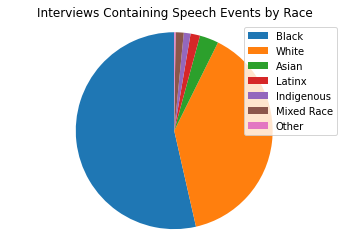

In [29]:
labels = ["Black", "White", "Asian", "Latinx", "Indigenous", "Mixed Race", "Other"]
sizes = [racemapevents['Black or African American'], racemapevents['White'], racemapevents['Asian'], racemapevents['Hispanic/Latinx'], racemapevents['Indigenous American or Alaska Native'], racemapevents['Two or More Races'], racemapevents['Other Race']]

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, labels=labels, startangle=90, labeldistance=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Interviews Containing Speech Events by Race")
pyplot.legend()
pyplot.show()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

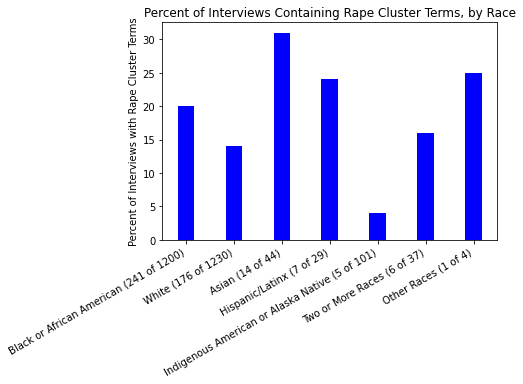

In [30]:
N = 7

ind = np.arange(N) 
values=[]

# some example data

    
    
values = np.array([int(100*racemapevents['Black or African American']/racemap['Black or African American']), int(100*racemapevents['White']/racemap['White']), int(100*racemapevents['Asian']/racemap['Asian']), int(100*racemapevents['Hispanic/Latinx']/racemap['Hispanic/Latinx']), int(100*racemapevents['Indigenous American or Alaska Native']/racemap['Indigenous American or Alaska Native']), int(100*racemapevents['Two or More Races']/racemap['Two or More Races']), int(100*racemapevents['Other Race']/racemap['Other Race'])])


x = range(len(values))


# and plot it
fig, ax = pyplot.subplots()
ax.bar(ind, values, .35, color="b")
ax.set_xticks(ind)
ax.set_xticklabels(["Black or African American ("+str(racemapevents["Black or African American"])+" of " + str(racemap["Black or African American"])+")", "White ("+str(racemapevents["White"])+" of " + str(racemap["White"])+")","Asian ("+str(racemapevents["Asian"])+" of " + str(racemap["Asian"])+")", "Hispanic/Latinx ("+str(racemapevents["Hispanic/Latinx"])+" of " + str(racemap["Hispanic/Latinx"])+")", "Indigenous American or Alaska Native ("+str(racemapevents["Indigenous American or Alaska Native"])+" of " + str(racemap["Indigenous American or Alaska Native"])+")", "Two or More Races ("+str(racemapevents["Two or More Races"])+" of " + str(racemap["Two or More Races"])+")", "Other Races ("+ str(racemapevents["Other Race"])+" of " + str(racemap["Other Race"])+")"])
ax.set_title('Percent of Interviews Containing Rape Cluster Terms, by Race')
ax.set_ylabel('Percent of Interviews with Rape Cluster Terms')
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


In [31]:
educationmap=defaultdict(lambda:0)
for i in text_to_ids:
    for j in text_to_ids[i]["id"]:
        educationmap[database[j]["education"]]+=1
print(educationmap)

defaultdict(<function <lambda> at 0x7fa00e6b1310>, {'High school graduate': 185, "Bachelor's degree": 734, 'Graduate or professional degree': 1362, "Associate's degree": 45, 'Some college': 142, '9th to 12th grade but no diploma': 120, 'Less than 9th grade': 44, 0: 142, 'RBNF 2': 9, 'RBNF 1': 4})


In [32]:
education_cohorts_map=dict()
education_cohorts_map["Bachelor's degree"]= "Up to College Degree"
education_cohorts_map['Graduate or professional degree']= "Graduate or Professional Degree"
education_cohorts_map['High school graduate']="Up to 12th Grade"
education_cohorts_map['9th to 12th grade but no diploma']= "Up to 12th Grade"
education_cohorts_map['Some college']= "Up to College Degree"
education_cohorts_map['Less than 9th grade']= "Up to 12th Grade"
education_cohorts_map["Associate's degree"]= "Up to College Degree"

In [33]:
educationmapcohorts=defaultdict(lambda:0)
for i in educationmap:
    if i in education_cohorts_map:
        educationmapcohorts[education_cohorts_map[i]]+=educationmap[i]
print(educationmapcohorts)

defaultdict(<function <lambda> at 0x7fa00e6b14c0>, {'Up to 12th Grade': 349, 'Up to College Degree': 921, 'Graduate or Professional Degree': 1362})


In [34]:
educationmapevents=defaultdict(lambda:0)
for i in names:
    for j in text_to_ids[i]["id"]:
        educationmapevents[database[j]["education"]]+=1
print(educationmapevents)

defaultdict(<function <lambda> at 0x7fa00e6b1280>, {'9th to 12th grade but no diploma': 19, "Bachelor's degree": 117, 0: 7, 'Graduate or professional degree': 262, 'Some college': 22, "Associate's degree": 10, 'High school graduate': 15, 'Less than 9th grade': 4, 'RBNF 1': 1})


In [35]:
educationmapcohortsevents=defaultdict(lambda:0)
for i in educationmapevents:
    if i in education_cohorts_map:
        educationmapcohortsevents[education_cohorts_map[i]]+=educationmapevents[i]
print(educationmapcohortsevents)

defaultdict(<function <lambda> at 0x7fa00e6b1670>, {'Up to 12th Grade': 38, 'Up to College Degree': 149, 'Graduate or Professional Degree': 262})


In [36]:
df_total_corpus = pandas.DataFrame([[educationmapcohorts["Up to 12th Grade"], educationmapcohortsevents["Up to 12th Grade"]],[educationmapcohorts["Up to College Degree"], educationmapcohortsevents["Up to College Degree"]],[educationmapcohorts["Graduate or Professional Degree"], educationmapcohortsevents["Graduate or Professional Degree"]]],index=["Up to 12th Grade", "Up to College Degree", "Graduate or Professional Degree"], columns=["Number of Interviews in Corpus", "Number of Interviews Containing Speech Events"])

In [37]:
display(df_total_corpus)

,Number of Interviews in Corpus,Number of Interviews Containing Speech Events
Up to 12th Grade,349,38
Up to College Degree,921,149
Graduate or Professional Degree,1362,262


[None, None, None, None, None, None]

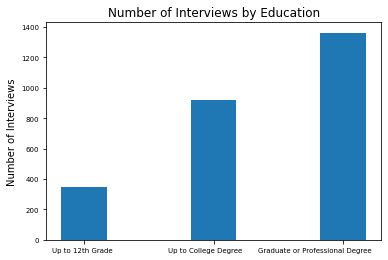

In [38]:
N = 3

ind = np.arange(N) 

# some example data
    
    
people = np.array([educationmapcohorts['Up to 12th Grade'], educationmapcohorts["Up to College Degree"], educationmapcohorts["Graduate or Professional Degree"]])



# and plot it
fig, ax = pyplot.subplots()
ax.set_xticks(ind)
total=ax.bar(ind, people, .35,)
ax.set_xticklabels(["Up to 12th Grade", "Up to College Degree", "Graduate or Professional Degree"])
ax.set_title("Number of Interviews by Education")
ax.set_ylabel('Number of Interviews')
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=10)
dx = .4
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')

[None, None, None, None, None, None]

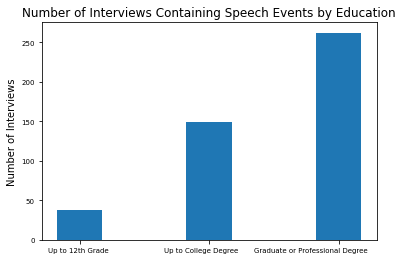

In [39]:
N = 3

ind = np.arange(N) 

# some example data
    
    
people = np.array([educationmapcohortsevents['Up to 12th Grade'], educationmapcohortsevents["Up to College Degree"], educationmapcohortsevents["Graduate or Professional Degree"]])



# and plot it
fig, ax = pyplot.subplots()
ax.set_xticks(ind)
total=ax.bar(ind, people, .35,)
ax.set_xticklabels(["Up to 12th Grade", "Up to College Degree", "Graduate or Professional Degree"])
ax.set_title("Number of Interviews Containing Speech Events by Education")
ax.set_ylabel('Number of Interviews')
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=10)
dx = .4
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')

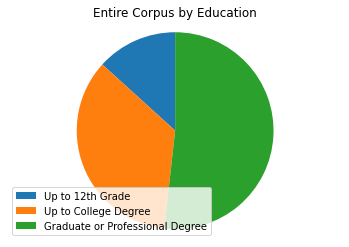

In [40]:
labels = ["Up to 12th Grade", "Up to College Degree", "Graduate or Professional Degree"]
sizes = [educationmapcohorts['Up to 12th Grade'], educationmapcohorts["Up to College Degree"], educationmapcohorts["Graduate or Professional Degree"]]

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, labels=labels, startangle=90, labeldistance=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pyplot.legend()
ax1.set_title("Entire Corpus by Education")
pyplot.show()

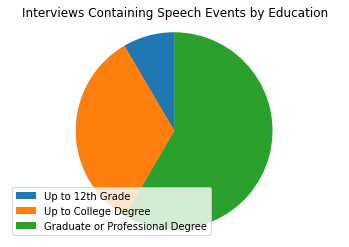

In [41]:
labels = ["Up to 12th Grade", "Up to College Degree", "Graduate or Professional Degree"]
sizes = [educationmapcohortsevents['Up to 12th Grade'], educationmapcohortsevents["Up to College Degree"], educationmapcohortsevents["Graduate or Professional Degree"]]

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, labels=labels, startangle=90, labeldistance=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pyplot.legend()
ax1.set_title("Interviews Containing Speech Events by Education")
pyplot.show()

[None, None, None, None, None, None]

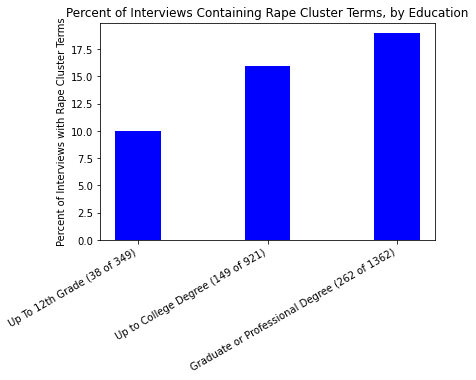

In [42]:
N = 3

ind = np.arange(N) 
values=[]

# some example data

    
    
values = np.array([int(100*educationmapcohortsevents['Up to 12th Grade']/educationmapcohorts['Up to 12th Grade']), int(100*educationmapcohortsevents['Up to College Degree']/educationmapcohorts['Up to College Degree']), int(100*educationmapcohortsevents['Graduate or Professional Degree']/educationmapcohorts['Graduate or Professional Degree'])])


x = range(len(values))


# and plot it
fig, ax = pyplot.subplots()
ax.bar(ind, values, .35, color="b")
ax.set_xticks(ind)
ax.set_xticklabels(["Up To 12th Grade ("+str(educationmapcohortsevents["Up to 12th Grade"])+" of " + str(educationmapcohorts["Up to 12th Grade"])+")", "Up to College Degree ("+str(educationmapcohortsevents["Up to College Degree"])+" of " + str(educationmapcohorts["Up to College Degree"])+")","Graduate or Professional Degree ("+str(educationmapcohortsevents["Graduate or Professional Degree"])+" of " + str(educationmapcohorts["Graduate or Professional Degree"])+")"])
ax.set_title('Percent of Interviews Containing Rape Cluster Terms, by Education')
ax.set_ylabel('Percent of Interviews with Rape Cluster Terms')
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [43]:
birthcohort=defaultdict(lambda:0)
for i in text_to_ids:
    for j in text_to_ids[i]["id"]:
        if not str(database[j]["real_interviewee_birth_year"]).isnumeric():
            continue
        birthcohort[(int(database[j]["real_interviewee_birth_year"])-1870)//30*30+1870]+=1
print(birthcohort)
birthcohort.pop(-20)

defaultdict(<function <lambda> at 0x7fa00eacf160>, {1870: 86, 1900: 781, 1930: 1453, -20: 142, 1960: 292, 1990: 7})


142

In [44]:
birthcohortevents=defaultdict(lambda:0)
for i in names:
    for j in text_to_ids[i]["id"]:
        if not str(database[j]["real_interviewee_birth_year"]).isnumeric():
            continue
        birthcohortevents[(int(database[j]["real_interviewee_birth_year"])-1870)//30*30+1870]+=1
print(birthcohortevents)
birthcohortevents.pop(-20)

defaultdict(<function <lambda> at 0x7fa00eacf790>, {1930: 289, -20: 7, 1960: 55, 1900: 88, 1870: 16})


7

In [45]:
df_total_corpus = pandas.DataFrame([[birthcohort[1870], birthcohortevents[1870]],[birthcohort[1900], birthcohortevents[1900]],[birthcohort[1930], birthcohortevents[1930]],[birthcohort[1960]+birthcohort[1990], birthcohortevents[1960]+birthcohortevents[1990]]],index=["1870-1899", "1900-1929", "1930-1959", "1960-1999"], columns=["Number of Interviews in Birth Cohort", "Number of Interviews in Birth Cohort Containing Speech Events"])

In [46]:
display(df_total_corpus)

,Number of Interviews in Birth Cohort,Number of Interviews in Birth Cohort Containing Speech Events
1870-1899,86,16
1900-1929,781,88
1930-1959,1453,289
1960-1999,299,55


[None, None, None, None, None, None, None, None]

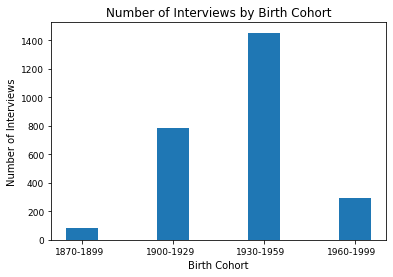

In [47]:
N = 4

ind = np.arange(N) 

# some example data
    
    
people = np.array([birthcohort[i] for i in range(1870, 1990, 30)])



# and plot it
fig, ax = pyplot.subplots()
ax.set_xticks(ind)
total=ax.bar(ind, people, .35,)
ax.set_xticklabels(["1870-1899", "1900-1929", "1930-1959", "1960-1999"])
ax.set_title("Number of Interviews by Birth Cohort")
ax.set_ylabel('Number of Interviews')
ax.set_xlabel('Birth Cohort')
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=10)
dx = .3
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')

[None, None, None, None, None, None, None, None]

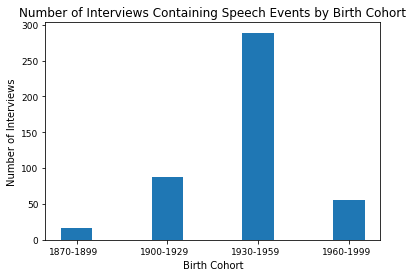

In [48]:
N = 4

ind = np.arange(N) 

# some example data
    
    
people = np.array([birthcohortevents[i] for i in range(1870, 1990, 30)])



# and plot it
fig, ax = pyplot.subplots()
ax.set_xticks(ind)
total=ax.bar(ind, people, .35,)
ax.set_xticklabels(["1870-1899", "1900-1929", "1930-1959", "1960-1999"])
ax.set_title("Number of Interviews Containing Speech Events by Birth Cohort")
ax.set_ylabel('Number of Interviews')
ax.set_xlabel('Birth Cohort')
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=10)
dx = .3
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')

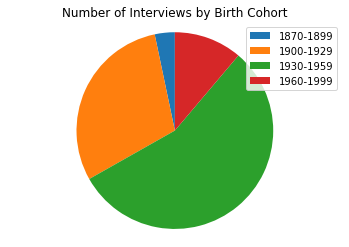

In [49]:
labels = ["1870-1899", "1900-1929", "1930-1959", "1960-1999"]
sizes =[birthcohort[i] for i in range(1870, 1990, 30)]

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, labels=labels, startangle=90, labeldistance=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pyplot.legend()
ax1.set_title("Number of Interviews by Birth Cohort")
pyplot.show()

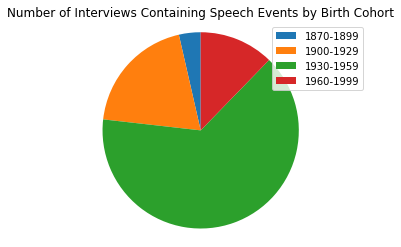

In [50]:
labels = ["1870-1899", "1900-1929", "1930-1959", "1960-1999"]
sizes =[birthcohortevents[i] for i in range(1870, 1990, 30)]

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, labels=labels, startangle=90, labeldistance=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pyplot.legend()
ax1.set_title("Number of Interviews Containing Speech Events by Birth Cohort")
pyplot.show()

In [51]:

myfile = open("data/SH.txt", encoding="latin1")
txt = myfile.readlines()
myfile.close()

files=[]

names=set()
for i in txt:
    num= i.find("<Files")
    if num !=-1:
        files.append(i.strip())

for i in files:
    i=i.split();
    i=i[0]
    i=i[i.find("\\\\",8)+2:-1]
    names.add(i.strip())
print(names)
        

{'HM_Amoore_Renee', 'SCAL_Berkman_Joyce', 'HM_Pratt_Sharon', 'HM_Ransby_Barbara', 'SCVF_Allison_Dorothy', 'SCAP_LaBarbera_Jen', 'BWSP_Mikuriya_Mary', 'OOHYLC_Messenger_Dorothy', 'HM_Webb_Wilma', 'UNCGAS_Allen_Jan', 'HM_Biggins_J.', 'SCAP_Jimenez_Ileana', 'SCVF_Apuzzo_Virginia', 'HM_Ciara_Barbara', 'RTRB_McCain_Beth', 'HM_Cost_Monica', 'UNCTWMS_Ray_Gloria', 'BWSP_Hopkins-Stapleton_Doris', 'SCAL_Pogrebin_LettyCottin', 'BWSP_Morse_Charlotte', 'WOL_Coleman_Carolyn', 'HM_Lewis_Tina', 'ROHA_Archibald_Alice', 'HM_Giovanni_Nikki', 'UNCGAS_Sved_Margery', 'HM_Lillie_Charisse', 'SCVF_Winslow_Barbara', 'HM_Stewart_Stacey', 'BWSP_Richardson_Joyce', 'SCVF_Steinem_Gloria', 'HM_Williams_Jamye', 'SCAARJ_Mingus_Mia', 'SCAP_Callahan_Kara', 'HM_Rogers_Desiree', 'UNCTWMS_Barrett_Lida_Kittrell', 'HM_Shorter_Vera', 'HM_Cooper_Maudine', 'BWOH_Harrison_Pleasant', 'WOL_Floyd_Billie_Jean', 'SHSF_Jacobs_Charlotte', 'HM_Bridgewater_Dee', 'UNCTWMS_Fuchs_Laurie', 'SHSF_Strober_Myra', 'RTRB_Coates_Betty', 'SHSF_Donal

In [52]:
years=[]
for i in range(1870, 2000, 10):
    years.append(str(i))

In [53]:
year_to_number_of_interviews=defaultdict(lambda:0)
year_to_number_of_interviews_SH=defaultdict(lambda:0)
for i in text_to_ids:
    year_to_number_of_interviews[text_to_ids[i]["interview year"]]+=1
for i in names:
    year_to_number_of_interviews_SH[text_to_ids[i]["interview year"]]+=1

years=[]
for i in range(1972, 2019, 1):
    years.append(str(i))
total=[]
hits_formatted=[]
for i in years:
    total.append(year_to_number_of_interviews[i])
    hits_formatted.append(year_to_number_of_interviews_SH[i])
percentage_int_year=[]
totalnum=sum(total)
print(totalnum)
for i in range(len(years)):
    if total[i]==0:
        percentage_int_year.append(0)
    else:    
        percentage_int_year.append(int(hits_formatted[i]/total[i]*100))



2635


In [54]:
total_by_int_year_for_table=[]
hits_by_int_year_for_table=[]
percentage_by_int_year_for_table=[]
for i in range(int(years[0])//5*5, int(years[-1])//5*5+1, 5):
    total=0
    hits=0
    for i in range(i, i+5, 1):
        total+= year_to_number_of_interviews[str(i)]
        hits+= year_to_number_of_interviews_SH[str(i)]
    total_by_int_year_for_table.append(total)
    hits_by_int_year_for_table.append(hits)
    percentage_by_int_year_for_table.append(int(hits/total*100))

In [55]:
df_percentage_in_int_year = pandas.DataFrame([total_by_int_year_for_table, hits_by_int_year_for_table, percentage_by_int_year_for_table], columns=['1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019'], index=["Number of Interviews Conducted in Decade", "Number of Interviews Conducted in Decade Containing Sexual Harassment Speech Events", "Percentage of Interviews Conducted in Decade Containing Sexual Harassment Speech Events"])

In [56]:
display(df_percentage_in_int_year)

,1970-1974,1975-1979,1980-1984,1985-1989,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019
Number of Interviews Conducted in Decade,32,107,28,90,16,34,417,671,911,329
Number of Interviews Conducted in Decade Containing Sexual Harassment Speech Events,1,3,2,3,2,4,25,37,55,15
Percentage of Interviews Conducted in Decade Containing Sexual Harassment Speech Events,3,2,7,3,12,11,5,5,6,4


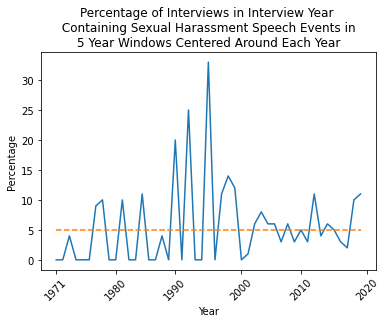

In [57]:
INCREMENTS=5
Year = range(len(percentage_int_year))
percentages = percentage_int_year
pyplot.plot(Year, percentages)
pyplot.plot(Year, [int(100*sum(hits_formatted)/totalnum) for i in range(len(percentage_int_year)) ], linestyle="dashed")
pyplot.title('Percentage of Interviews in Interview Year \n Containing Sexual Harassment Speech Events in \n'+str(INCREMENTS)+ " Year Windows Centered Around Each Year")
pyplot.xlabel('Year')
pyplot.ylabel('Percentage')
pyplot.xticks(rotation = 45)
positions = [len(percentage_int_year)*i//5 for i in range(6)]
labels = (1971, 1980, 1990, 2000, 2010, 2020)
pyplot.xticks(positions, labels)
pyplot.show()

In [58]:
years=[]
for i in range(1870, 2000, 10):
    years.append(str(i))

In [59]:
DECADE_INCREMENTS=3
birthyear_to_number_of_interviews_white=defaultdict(lambda:0)
birthyear_to_number_of_interviews_CSH_white=defaultdict(lambda:0)
birthyear_to_number_of_interviews_black=defaultdict(lambda:0)
birthyear_to_number_of_interviews_CSH_black=defaultdict(lambda:0)
for i in text_to_ids:
    for j in text_to_ids[i]["id"]:
        if  database[j]["identified_race"]=="Black or African American":
            birthyear_to_number_of_interviews_black[int(database[j]["\ufeffbirth_decade"][:4])]+=1
        elif database[j]["identified_race"]=="White":
            birthyear_to_number_of_interviews_white[int(database[j]["\ufeffbirth_decade"][:4])]+=1
for i in names:
    for j in text_to_ids[i]["id"]:
        if database[j]["identified_race"]=="White":
            birthyear_to_number_of_interviews_CSH_white[int(database[j]["\ufeffbirth_decade"][:4])]+=1
        elif database[j]["identified_race"]=="Black or African American":
            birthyear_to_number_of_interviews_CSH_black[int(database[j]["\ufeffbirth_decade"][:4])]+=1
total_white=[]
hits_formatted_white=[]
total_black=[]
hits_formatted_black=[]
for i in years:
    total_white.append(birthyear_to_number_of_interviews_white[int(i)])
    hits_formatted_white.append(birthyear_to_number_of_interviews_CSH_white[int(i)])
    total_black.append(birthyear_to_number_of_interviews_black[int(i)])
    hits_formatted_black.append(birthyear_to_number_of_interviews_CSH_black[int(i)])
print(hits_formatted_white)
percentage_withNI_white=[]
percentage_withNI_black=[]
total_white_blocks=[]
hits_formatted_white_blocks=[]
total_black_blocks=[]
hits_formatted_black_blocks=[]
for i in range(0,len(years),DECADE_INCREMENTS):
    white_total=0
    white_hits=0
    black_total=0
    black_hits=0
    print(i)
    for j in range(i, min(i+DECADE_INCREMENTS, len(years))):
        white_total+= total_white[j]
        white_hits+= hits_formatted_white[j]
        black_total+= total_black[j]
        black_hits+= hits_formatted_black[j]
    if white_total==0:
        percentage_withNI_white.append(0)
    else:    
        percentage_withNI_white.append(int(white_hits/white_total*100))
    if black_total==0:
        percentage_withNI_black.append(0)
    else:
        percentage_withNI_black.append(int(black_hits/black_total*100))
    total_white_blocks.append(white_total)
    hits_formatted_white_blocks.append(white_hits)
    total_black_blocks.append(black_total)
    hits_formatted_black_blocks.append(black_hits)
print(percentage_withNI_black)


[0, 0, 0, 2, 6, 17, 13, 32, 7, 3, 0, 0, 0]
0
3
6
9
12
[5, 3, 5, 3, 0]


[0 1 2 3]


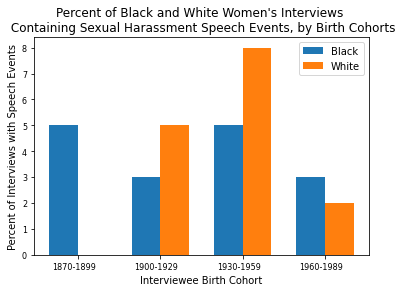

In [60]:
N = 4

ind = np.arange(N) 
print(ind)

# some example data
    
    
black = np.array(percentage_withNI_black[:4])
white=np.array(percentage_withNI_white[:4])


x = range(N)


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(ind-.35/2, black, .35, label="Black")
total=ax.bar(ind+.35/2, white, .35, label="White")
ax.set_xticks(ind)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .25
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
ax.set_xticklabels(['1870-1899', '1900-1929', '1930-1959', '1960-1989'])
ax.set_title("Percent of Black and White Women's Interviews \n Containing Sexual Harassment Speech Events, by Birth Cohorts")
ax.set_ylabel('Percent of Interviews with Speech Events')
ax.set_xlabel('Interviewee Birth Cohort')
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')
pyplot.legend()

In [61]:
df_percentage_in_birth_cohort_by_race = pandas.DataFrame([total_black_blocks, hits_formatted_black_blocks, percentage_withNI_black, total_white_blocks, hits_formatted_white_blocks, percentage_withNI_white], columns=['1870-1899', '1900-1929', '1930-1959', '1960-1989', '1990-1999'], index=["Number of Interviews with Black Women", "Number of Interviews with Black Women Containing Sexual Harassment Speech Events", "Percentage of Black Women in Birth Cohort whose Interviews Containing Sexual Harassment Speech Events", "Number of Interviews with White Women", "Number of Interviews with White Women Containing Sexual Harassment Speech Events", "Percentage of White Women in Birth Cohort whose Interviews Containing Sexual Harassment Speech Events"])

In [62]:
display(df_percentage_in_birth_cohort_by_race)

,1870-1899,1900-1929,1930-1959,1960-1989,1990-1999
Number of Interviews with Black Women,40,259,773,126,2
Number of Interviews with Black Women Containing Sexual Harassment Speech Events,2,10,40,4,0
Percentage of Black Women in Birth Cohort whose Interviews Containing Sexual Harassment Speech Events,5,3,5,3,0
Number of Interviews with White Women,46,484,583,114,3
Number of Interviews with White Women Containing Sexual Harassment Speech Events,0,25,52,3,0
Percentage of White Women in Birth Cohort whose Interviews Containing Sexual Harassment Speech Events,0,5,8,2,0
